Source: https://en.wikipedia.org/wiki/Hilbert_curve

Personally, I failed to find patterns in this fractal, such as it could be generated with IPS or recursively.
What I did find though, was something more interesting for it is new method I haven't encountered before — L-system.

https://en.wikipedia.org/wiki/L-system

They are used to describe many things of self-replicating in shape nature, particularly fractals.

Shortly, L-system consists of:
- alphabet — variables that are substituted due to production rules
- constants — constant values
- axiom — starting point
- production rules — how variables are changed (into what)

Particularly for Hilber curve:
- Alphabet : A, B
- Constants : F + −
- Axiom : A
- Production rules:
  - A → +BF−AFA−FB+
  - B → −AF+BFB+FA−

How we interpret these?:
- "F" means "draw forward"
- "-" means "turn left 90°"
- "+" means "turn right 90°"
- A, B during visualisation are ignored

# 1. import

In [3]:
# for storing data for matplotlib.pyplot
import numpy as np
# for visualising data
import matplotlib.pyplot as plt
# for defining directions
from enum import Enum, auto

# 2. definitions

## 2.1. Direction

In [6]:
# direction enum
class Direction(Enum):
    NORTH = 0
    EAST = 1
    SOUTH = 2
    WEST = 3

    # turn right if '+' and turn left if '-' relative to current direction
    def rotate(self, sign):
        if sign == '+':
            return Direction((self.value + 1) % 4)

        return Direction((self.value - 1) % 4)

## 2.2. production rules

In [8]:
# production rules for Hilbert curve
HILBERT_dict = {
    "A": "+BF-AFA-FB+",
    "B": "-AF+BFB+FA-",
}

## 2.3. Generate L-system for Hilbert curve

In [10]:
def hilbert_code(n):
    # axiom
    result = "A"

    # depending on depth
    for _ in range(n):
        components = []

        for c in result:
            # if current entry is variable
            if c in HILBERT_dict.keys():
                # use production rule
                components.append(HILBERT_dict[c])
            else:
                # otherwise this is constant and write it as is
                components.append(c)
        
        # join components into string
        result = ''.join(components)
        
    return result

## 2.4. L-system into directions

In [12]:
def hilbert_directions(code, start_direction):
    # directions to navigate
    directions = []
    # start
    last_direction = start_direction
    
    for el in code:
        # F means to draw accumulated directions
        if el == 'F':
            directions.append(last_direction)
            continue
        # otherwise accumulate them
        last_direction = last_direction.rotate(el)

    return directions

## 2.5. direction integration into plane

In [14]:
def make_step(point, direction):
    # every step is 1 unit long
    match direction:
        case Direction.NORTH:
            # move north ([x, y] + [0, 1])
            return (point[0], point[1] + 1)
        case Direction.EAST:
            # move east ([x, y] + [1, 0])
            return (point[0] + 1, point[1])
        case Direction.SOUTH:
            # move south ([x, y] + [0, -1])
            return (point[0], point[1] - 1)
        case Direction.WEST:
            # move west ([x, y] + [-1, 0])
            return (point[0] - 1, point[1])

## 2.6. calculating scaling factor

In [16]:
# function is used, since edge length is 1 unit long, so overall size of visualisation will be greater than 1 unit
# we want to squish it into 1x1 square
def scale_factor(n):
    # formula found empirically but also kinda makes sense (?) idk how to describe it
    # remove use of scale_factor in hilbert_plot and look at heights of consecutive Hilbert curve visualisations
    return 2 ** n - 1

## 2.7. assemly together — generate points of Hilbert curve

In [18]:
def hilbert(n, use_scale=True, start_point=(0, 1), start_direction=Direction.NORTH):
    # generate L-system
    # remove A, B as they are needed only for generation and are useless during visualisation
    code = hilbert_code(n).replace('A', '').replace('B', '')
    # convert code into directions
    directions = hilbert_directions(code, start_direction)
    points = [(0, 0)]

    # for every direction
    for direction in directions:
        # retrieve where next point should lie
        points.append(make_step(points[-1], direction))

    # turn points into np.array matrix
    # every row is point as [x y]
    data = np.array(points, dtype=np.float64)

    # scale data by scale factor to squish it into 1x1
    if use_scale:
        data /= scale_factor(n)
        data += start_point
    
    return data

## 2.8. visualisation

In [20]:
def hilbert_plot(n, use_scale=True, start_point=(0, 1), start_direction=Direction.EAST):
    data = hilbert(n, use_scale, start_point, start_direction)

    # so plot is actual square
    plt.figure(figsize=(10, 10))
    # present data
    plt.plot(data[:,0], data[:,1])

    return

# 3. Examples

## 3.1. with scaling

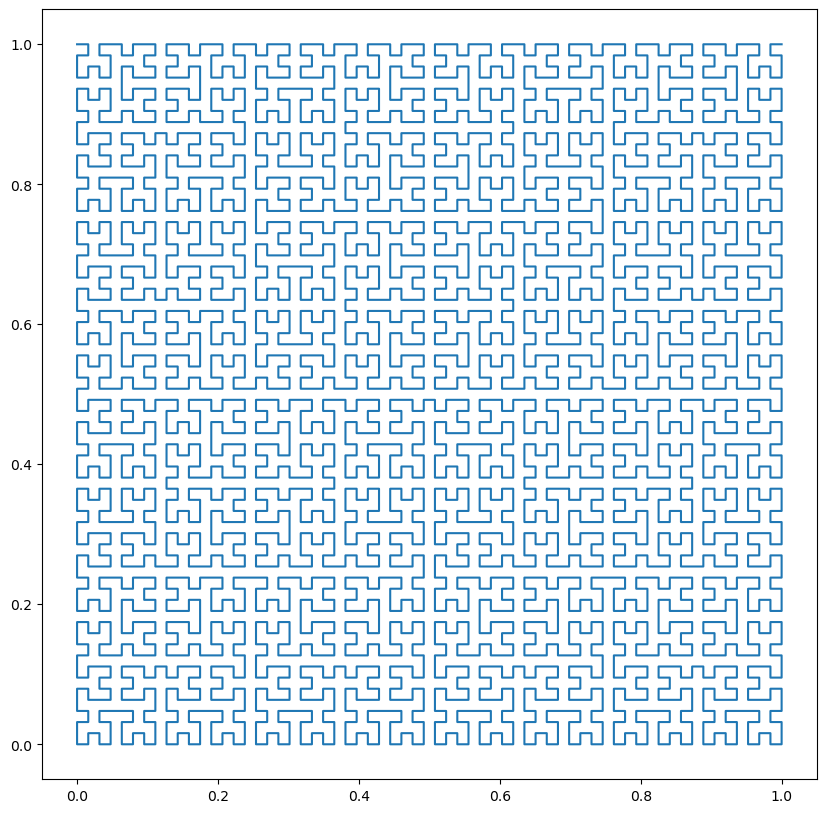

In [23]:
hilbert_plot(6)

## 3.2. without scaling

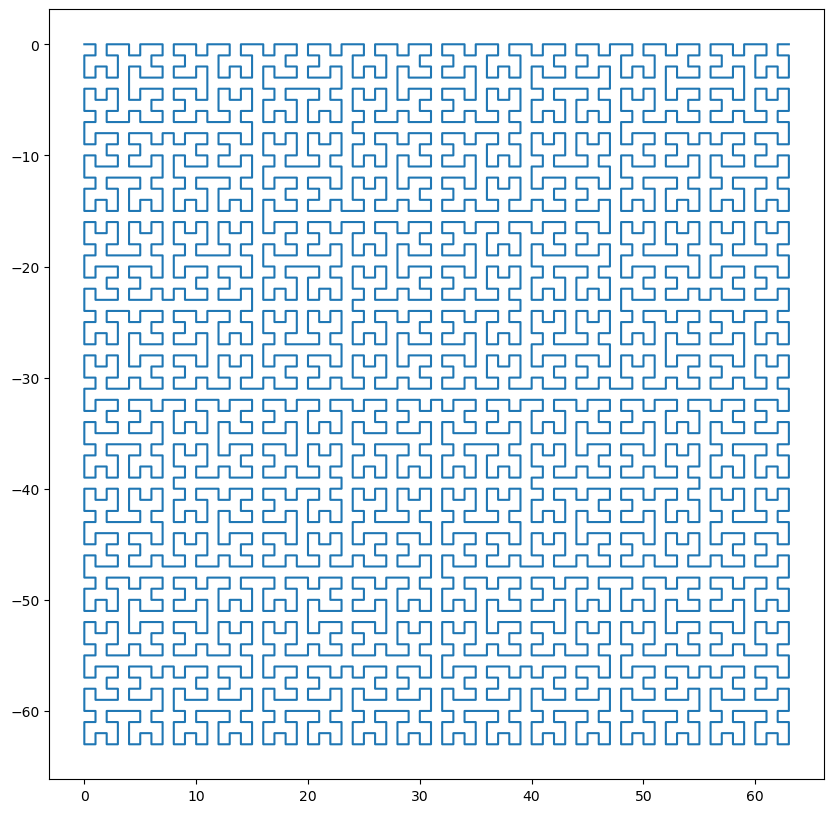

In [25]:
hilbert_plot(6, False)